In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = 'data/ex1data1.txt'
data = pd.read_csv(data_path, header=None, names = ["x1", "y"])
data.head()

,x1,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
m = data.shape[0]
data.insert(loc=0,column='x0',value=np.ones(m))
data.head()

,x0,x1,y
0,1.0,6.1101,17.5920
1,1.0,5.5277,9.1302
2,1.0,8.5186,13.6620
3,1.0,7.0032,11.8540
4,1.0,5.8598,6.8233


In [4]:
x = data[data.columns[0:data.shape[1]-1]]
n = data.shape[1]-1
y = data[data.columns[n:n+1]]
# convert to np.array
x = x.values
y = y.values

In [5]:
# Normal Equation

from numpy.linalg import inv
def normEqn(x,y):
    #restheta = np.zeros((X.shape[1],1))
    return np.dot(np.dot(inv(np.dot(x.T,x)),x.T),y)

In [6]:
theta_normeqn = normEqn(x,y)
theta_normeqn
# compared to the theta obtained from univariate linear regression
# array([[-3.63029144],
#       [ 1.16636235]])

array([[-3.89578088],
       [ 1.19303364]])

In [7]:
theta = np.array([[-3.89578088],
       [ 1.19303364]])

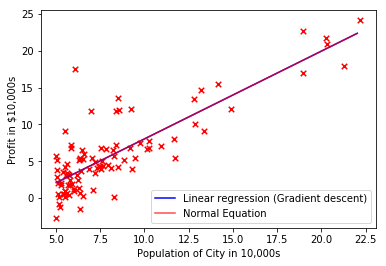

In [9]:
import matplotlib.pyplot as plt
x_range = np.arange(min(data['x1']),max(data['x1']))
y_range = theta[0] + theta[1]*x_range
y_range_normeqn = theta_normeqn[0] + theta_normeqn[1]*x_range

x1 = data['x1']
plt.scatter(x1,y,s=30,c='r',marker='x',linewidths=1)

plt.plot(x_range,y_range, label='Linear regression (Gradient descent)',c='b')
plt.plot(x_range,y_range_normeqn, label='Normal Equation',c='r',alpha=0.7)


plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)
plt.show()